### Importacion de Liberias Usadas y uso del programa
Para todo el documento solo se hizo uso de 3 librerias proporcionadas por la comunidad de Python, estas librerias tuvieron que ser instaladas atravez del Promt de Anaconda y constan de las siguientes:

* Se usaron las librerias de Open Cv para el tracke de la 

* Se utilizo una libreria adicional de Open Cv para agregar un Tracker ya hecho por la comunidad

* Se usp Numyp para la parte de operacion de Matrices de OpenCv

* Se uso Matplotlib para graficar las posiciones, velocidades y haceleraciones

#### Uso del Programa

Cuando el programa de ejecucion se mostrara el primer fotograma del Video cargado, video que se debe encontrar en la carpeta rezources, una vez en el primer fotograma el usuario debe de dibujar un cuadro al rededor del objeto que desea hacer tracking, cuando quiero porceguir con el proceso, presione enter y el programa correra solo, puede detenerlo cuando desee presionando la tecla q de lo contrario el video terminara de manera automatica


In [1]:
#inicializacion de las Librerias que se van a usar
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### Inicializacion de variables y videos para hacer seguimiento
en la siguiente parte se hace un llamado al video deseado, Video que tiene que estar alojado en la carpeta 'Resourses' de lo contrario el programa sera incapaz de hacer una llamado del mismo. Se inicializa la captura del mismo y ademas se llama al tracker CSRT que es el que importamos anteriormente con la librerioa OpenCv-Contrib, dentro del Codigo se encuentra el Tracker MOOSE que decidimos descartar puesto que apesar de ser mas rapido cuenta con la desventaja de ser mas impresizo

In [2]:
#Parte del Programa Que inicializa al Tracker y carga el Video que se va a Utilizar

cap=cv2.VideoCapture('Resources/BalonCaida.mp4')
#tracker = cv2.TrackerMOSSE_create()
tracker=cv2.TrackerCSRT_create()
succes,img=cap.read()
bbox=cv2.selectROI('Tracking',img,False)
tracker.init(img,bbox)

True

### Definicion Vectores tiempo y posicion

se definen los vectores que recogeran los datos de posicion y tiempo de todo el recorrido del Objeto Seleccionado ademas de definir la funcion encargada de dibujar el rectangulo de seguimiento verde que se ve cuando se inicia a Correr el Video Tracker


In [3]:
yvector = []
xvector = []
tvector=[]
#Funcion que constantemente dibujara un cuadro sobre el objeto a detectar----------------------
def drawBox(img,bbox):
    x,y,w,h=int(bbox[0]),int(bbox[1]),int(bbox[2]),int(bbox[3])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    

## Ciclo infinito del Programa

este ciclo sera el encargado de recorrer fotograma a fotograma del video haciendo posible la ejecucion del tracker y del video mismo. 
Ademas sera la parte mas fundamental del codigo puesto que aqui mismo se realizara el llenado de los vecotores de posicion y tiempo, vectores indispenzables para la graficacion del comportamiento de nuestro objeto a seguir. Cuenta con un verificador que nos dice cuando existe un frame esto se hace para evitar que el programa muestre una matriz vacia, puesto que tiene problemas cuando se le arrojan este tipo de resultados.

Un Listado de las funciones del While serian las siguientes

* Para empezar se decidion hacer un contador de frames, contador que nos dira cuanto duro el video que se analizo
* seguimos con el contador de ticks, tambien fundamental para realizar mediciones respecto al video analizado
* estas dos variables seran encargadas de trabajos importantosimos. Primero esta la verificacion, que sera True siempre y cuando no se trate del ultimo fotograma, despues contamos con img que sera la que campture el frame para mostrar.
* Recuperara la informacion de la posicion de la Bounding Box, esto sera usado para llenar el venctor de posicion en X y en Y, ademas de llenar el vector del tiempo
* Sigue con la parte que nos dira si se esta realizando un seguimiento del objeto esto haciendo uso de la variable succes que sera True siempre y cuando se este realizando el proceso de Tracking
* Un apartado adicional que nos dira a cuantos Fps estara corriendo el video en ese momento, informacion tal vez inutil, pero se ve bien.
* Por ultimo tenemos la parte que va ha mostar cada frame dando la ilusion de movimiento. Esta parte cuenta con una seguridad para evitar que se muestre una imagen de tamaño 0x0, esto es debido a que python no entiende que se acaba el video, y seguira intentando mostar algo que no tiene, llevando a un error en el programa






In [4]:
frames=0
while True:
    #Contador de tiempo para la duracion del video, medido en Ticks
    timer=cv2.getTickCount()
    
    #verificaicion determina del rastreo de la imagen y video 
    verification,img=cap.read()
    succes,bbox=tracker.update(img)

    #Recoge informacion de la ubicacion del objeto tomando la esquina superior izquierda como referencia
    
    x, y = int(bbox[0]), int(bbox[1])
    xvector.append(x)
    yvector.append(y)
    tvector.append(frames)
    frames=frames+1
    
    #Dibujara Pondra un Texto que indique si se esta realizando Tracking del Objeto seleccionado
    if succes == True:
        drawBox(img,bbox)
        cv2.putText(img, 'Tracking', (75, 75), cv2.FAST_FEATURE_DETECTOR_TYPE_7_12, 1, (255, 0, 0), 1)
    else:
        cv2.putText(img,'Lost', (75, 75), cv2.FAST_FEATURE_DETECTOR_TYPE_7_12, 1, (0, 0, 255), 1)

    #Formula para calcular los Fps del video y display del mismo sobre la pantalla
    
    fps=cv2.getTickFrequency()/(cv2.getTickCount()-timer)
    cv2.putText(img,str(int(fps)),(75,50),cv2.FAST_FEATURE_DETECTOR_TYPE_7_12,1,(0,0,255),1)
    
    #Parte super importante pq permite que no muera el codigo, al evitar una imagen sin dimensiones
    
    if verification:
        height, width, channels = img.shape
        if height>0 and width>0:
            cv2.imshow('Tracking',img)
    else:
        cap.release()
        cv2.destroyAllWindows()
        break
    if cv2.waitKey(1) & 0xFF==ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break
        
       

### Reposicionamiento

Esta parte es la encarga de mover el marco de referencia a donde lo desee el usuario, por cuestiones de tiempo el programa esta configurado para mover el marco de referencia original de la esquina superior izquierda a la esquina inferior izquierda, y define el vector de tiempo

La verdad esta parte del programa solo mueve 'y' a la parte de abajo, no posiciona el marco de referencia y tampoco es capaz de definir la equivalencia distancia pixeles, esto es debido a que no alcanzo el tiempo para esto, como equipo subestimamos la tarea que apriori parecia simple.



In [5]:
#Creacion de los vectores de Posicion y Tiempo para la respecitva graficacion
mseconds=[]
for i in tvector:
    mseconds.append(tvector[i]*int(fps))


yposition=list()
xposition=list()
for h in yvector:
    if h - height >= 0:
        yposition.append(h-height)
    else:
        yposition.append((h-height)*-1)
for w in xvector:
    width=0
    if w - width >= 0:
        xposition.append(w-width)
    else:
        xposition.append((w-width)*-1)
         

## Creacion de los vectores Velocidad
  
  La parte mas divertida del codigo, donde podemos hacer uso de la famosisima definicion de la derivada, haciendo uso de esta tecnica podemos ahorrarnos el hecho de encontrar la ecuacion que rige nuestro sistema, para esto tendriamos que hacer uso de tecnicas de interpolacion, entonces Podemos implementear esto haciendo uso de la siguiente ecuacion:
  
  $\frac{d}{dx}f(x_{[i]})=\frac{f(x_{[i+1]})-f(x_{[i-1]})}{\Delta x}$
  
  Y haciendo unos pequeños reajsutes para los puntos extremos puesto que si se deja de esta manera botarioa un error al no encontrar datos, de tiendo de esta manera que cuando se encuentre en la primera posicion tendra encuenta esta ecuacion:
  
  $\frac{d}{dx}f(x_{[i]})=\frac{f(x_{[i+1]})-f(x_{[i]})}{2\Delta x}$
  
  Y cuenda el vector se encuentre en la ultima posicion tendra en cuenta esta ecuacion:
  
  $\frac{d}{dx}f(x_{[i]})=\frac{f(x_{[i]})-f(x_{[i-1]})}{\Delta x}$
  
  Esta derivacion se realiza tanto para el vector de posicion en X como para el vector de posicion en Y

In [6]:
#Derivar con la definicion de la Derivada exectuando puntos extremos
n=len(tvector)
dx=((tvector[-1]-tvector[0])/n-1) #Crea el Delta de X de Manera automatica
ypx=np.zeros_like(tvector)#Crea el vector en blanco de la derivada
for i in range(n):
    if i==0:
        ypx[i]=(xvector[i+1]-xvector[i])/dx
    elif i==n-1:
        ypx[i] = (xvector[i] - xvector[i-1]) / dx
    else:
        ypx[i] = (xvector[i + 1] - xvector[i-1]) /(2*dx)
                  
ypy=np.zeros_like(tvector)#Crea el vector en blanco de la derivada
for i in range(n):
    if i==0:
        ypy[i]=(yvector[i+1]-yvector[i])/dx
    elif i==n-1:
        ypy[i] = (yvector[i] - yvector[i-1]) / dx
    else:
        ypy[i] = (yvector[i + 1] - yvector[i-1]) /(2*dx)
                  
                  

## Creacion de los vectores Aceleracion
  
 LLegamos a la segunda parte mas divertida del codigo, donde podemos hacer uso de la famosisima definicion de la derivada de nuevo,sin enbargo esta vez se trata de la derivada en segundo orden. hacemos uso de la derivada en segundo orden por que el vector de velocidad presenta irregularidades sobre todo en los extremos, entonces si volvemos a derivar sobre la Velocida lo que hariamos es magnificar ese error, para la aceleracion. El error existe sobre todo por que el tracker no es consistente y presentara variaciones irregulares en sus coordenadas, al hacerle seguimiento al objeto.
  Las ecuaciones usadas son las siguientes: 
  
  $\frac{d^2}{dx^2}f(x_{[i]})=\frac{f(x_{[i+1]})-2f(x_{[i]})-f(x_{[i-1]})}{\Delta x^2}$
  
  Reajustando unos valores en especifico,los puntos extremos, evitamos que el programa lanze error por no encontrar datos, lo mismo que pasaba con la primera derivada quedando esta ecuacion para la primera posicion:
  
  $\frac{d^2}{dx^2}f(x_{[i]})=\frac{f(x_{[i+2]})-2f(x_{[i+1]})-f(x_{[i]})}{\Delta x^2}$
  
  Y cuendo el vector se encuentre en la ultima posicion tendra en cuenta la siguiente ecuacion:
  
  $\frac{d^2}{dx^2}f(x_{[i]})=\frac{f(x_{[i]})-2f(x_{[i-1]})-f(x_{[i-2]})}{\Delta x^2}$
  
  Esta derivacion se realiza tanto para el vector de posicion en X como para el vector de posicion en Y


In [7]:
#Deriva Dos veces con la misma deficinon de la Derivada
n=len(tvector)
dx=((tvector[-1]-tvector[0])/n-1)#Crea el Delta de X de Manera automatica
yppx=np.zeros_like(tvector)#Crea el vector en blanco de la derivada
for i in range(n):
    if i==0:
        yppx[i]=(xvector[i+2]-2*xvector[i+1]+xvector[i])/(dx**2)
    elif i==n-1:
        yppx[i]=(xvector[i]-2*xvector[i-1]+xvector[i-2])/(dx**2)
    else:
        yppx[i]=(xvector[i+1]-2*xvector[i]+xvector[i-1])/(dx**2)
yppy=np.zeros_like(mseconds)#Crea el vector en blanco de la derivada
for i in range(n):
    if i==0:
        yppy[i]=(yvector[i+2]-2*yvector[i+1]+yvector[i])/(dx**2)
    elif i==n-1:
        yppy[i]=(yvector[i]-2*yvector[i-1]+yvector[i-2])/(dx**2)
    else:
        yppy[i]=(yvector[i+1]-2*yvector[i]+yvector[i-1])/(dx**2) 
  

## Graficacion

Por ultimo y tras haber realizado seguimiento, reposicionamiento, derivacion nos queda la parte mas agradable del programa, la graficacion. Donde mostrarelos los resultados del tracker y sus respectivas graficas, definitivamente la parte mas relajente del programa, donde los errores son minimos, faciles de correguir y muy llevaderos, donde sabes que ya terminaste un verdadero logro y satisfaccion de realizar.

No se requiere expliacion del funcionamiento de codigo ya que es muy autodescriptivo.

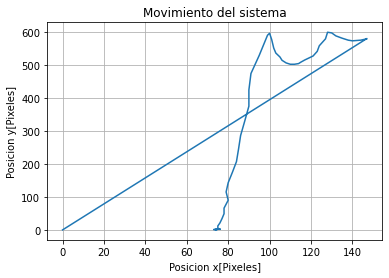

In [8]:
#Grafica el Movimiento del Objeto Analizado        
        
plt.plot(xvector,yvector)
plt.xlabel('Posicion x[Pixeles]')
plt.ylabel('Posicion y[Pixeles]')
plt.title('Movimiento del sistema')
plt.grid(True)
plt.show()

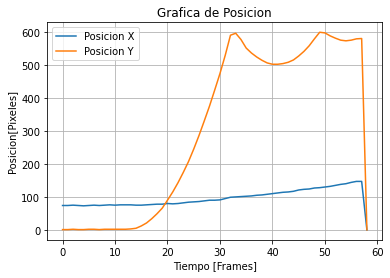

In [9]:
#Crea Una Grafica de la Posicion respecto al tiempo en de X y Y

plt.plot(tvector,xvector, label="Posicion X")
plt.plot(tvector,yvector, label='Posicion Y')
plt.xlabel('Tiempo [Frames]')
plt.ylabel('Posicion[Pixeles]')
plt.title('Grafica de Posicion')
plt.legend()
plt.grid(True)
plt.show()



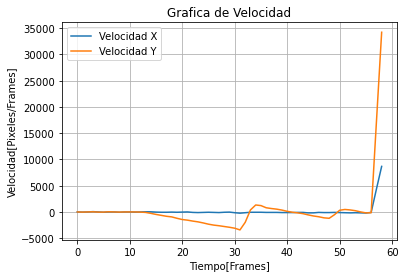

In [10]:
#Crea Una Grafica de la Velocidad respecto al tiempo en de X y Y

plt.plot(tvector,ypx,label="Velocidad X")
plt.plot(tvector,ypy,label="Velocidad Y")
plt.xlabel('Tiempo[Frames]')
plt.ylabel('Velocidad[Pixeles/Frames]')
plt.title('Grafica de Velocidad')
plt.legend()
plt.grid(True)
plt.show()



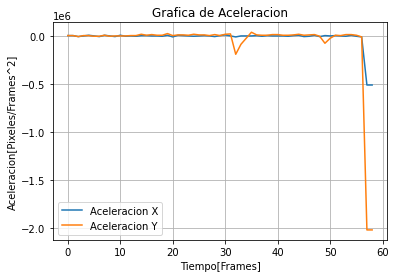

In [11]:
#Crea Una Grafica de la Aceleracion respecto al tiempo en de X y Y

plt.plot(tvector,yppx,label="Aceleracion X")
plt.plot(tvector,yppy,label="Aceleracion Y")
plt.xlabel('Tiempo[Frames]')
plt.ylabel('Aceleracion[Pixeles/Frames^2]')
plt.title('Grafica de Aceleracion')
plt.legend()
plt.grid(True)
plt.show()



#### Bibliografia

Mucha parte de este codigo fue sacado de tutoriales encontrados en la platadorma Youtube, puesto que nuestra experiencia con los librerias usadas son casi nulas.Los videos consultados fueron los siguientes:


* El mas importante de todos fue [EL tutorial de OpenCv]('https://www.youtube.com/watch?v=WQeoO7MI0Bs&t=4550s') apesar de no usar ningun codigo de los mostrados aqui fue fundamental para el entendimiento de la libreria.

*  Luego seguieria el responsable del [Tracking]('https://www.youtube.com/watch?v=1FJWXOO1SRI&t=901s') de este video se saco todo el codigo que permite hacerle seguimiento al objeto que se desee.

* Otro que me salvo la vida en especifico fue el de la [Derivacion]('https://www.youtube.com/watch?v=ZhiuH9l_tB0&t=688s')

* Uno bastante corto pero muy util para la [Graficacion]('https://www.youtube.com/watch?v=aCULcv_IQYw')

* Y el que me permitio hacer todo esto a las [2:00am]('https://www.youtube.com/watch?v=jBCB23pQeIA')


Ademas de hacer uso de la plataforma de Youtube se utilizaron paginas como [GitHub]('https://github.com/'), [StackOverFlow]('https://stackoverflow.com/') y [Reddit]('https://www.reddit.com/') para la solicion de preguntas sobre errores presentes en el proyecto.